# Using the OmicsIntegrator Package

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx

# Use the following lines to test the basic functionality of the package if developing locally: 
# import sys
# sys.path.insert(0, "/the/path/to/OmicsIntegrator2/src")
# from graph import Graph

from OmicsIntegrator import *

interactome_file = "/Users/alex/Documents/OmicsIntegrator2/data/iref13.cleaned.connected.tsv"
prize_file = "/Users/alex/Documents/OmicsIntegrator2/data/prizes.tsv"
graph = Graph(interactome_file, {})

graph.prepare_prizes(prize_file)


12:30:08 - Graph: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
12:30:08 - Graph: INFO - ['CTGF', 'EZR', 'HSPA5']
12:30:08 - Graph: INFO - Members of the prize file not present in the interactome:
12:30:08 - Graph: INFO - ['CALM1', 'KIAA1543', 'PKM2', 'PLEC1', 'RBM14', 'SFRS1']


In [3]:
vertex_indices, edge_indices = graph.pcsf()

In [4]:
forest, augmented_forest = graph.output_forest_as_networkx(vertex_indices, edge_indices)
forest

/Users/alex/Documents/OmicsIntegrator2/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/alex/Documents/OmicsIntegrator2/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/alex/Documents/OmicsIntegrator2/venv/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/alex/Documents/OmicsIntegrator2/venv/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserW

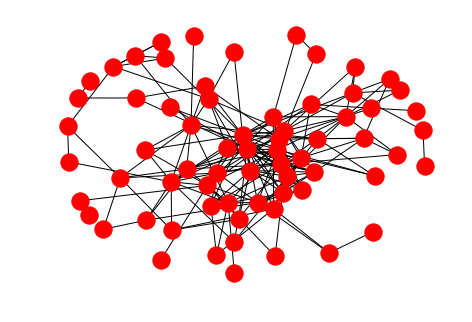

In [5]:
nx.draw_spring(augmented_forest)

In [6]:
graph.pcsf_objective_value(forest)

19.255917409999981

In [7]:
get_networkx_graph_as_dataframe_of_nodes(forest)

,degree,louvainClusters,prize
CASP8,158.0,3.0,0.00
CDH1,128.0,3.0,1.54
CNBP,57.0,5.0,0.43
COL1A2,40.0,1.0,0.00
CTGF,26.0,3.0,0.84
CTNNA1,59.0,3.0,0.76
CTNND1,48.0,3.0,0.88
CYR61,8.0,0.0,0.96
DGCR14,39.0,0.0,0.00
DKFZP781L0540,23.0,4.0,0.00


In [9]:
output_networkx_graph_as_gml_for_cytoscape(augmented_forest, '.', 'augmented_forest.gml')

In [10]:
Gs = [20, 200, 2000]
# Beta is the factor on the prizes I think. Default is 1.
Bs = [0.7, 0.8, 0.9]
# Omega is dummy edge cost. Higher and you get fewer graphs.
Ws = [1, 2, 5, 8]

forest, augmented_forest, params_by_nodes = graph.grid_search(prize_file, Gs, Bs, Ws)


12:32:21 - Graph: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
12:32:21 - Graph: INFO - ['CTGF', 'EZR', 'HSPA5']
12:32:21 - Graph: INFO - Members of the prize file not present in the interactome:
12:32:21 - Graph: INFO - ['CALM1', 'KIAA1543', 'PKM2', 'PLEC1', 'RBM14', 'SFRS1']


In [23]:
get_networkx_graph_as_dataframe_of_nodes(forest)

,degree,frequency,louvainClusters,prize
ABI3,26,"((SRC, 1.0), (ITGB4, 1.0), (MAPK14, 1.0), (DLG...",6,0.00
BCAR1,78,"((SRC, 1.0), (ITGB4, 1.0), (MAPK14, 1.0), (DLG...",3,0.29
BTC,5,"((SRC, 1.0), (ITGB4, 1.0), (MAPK14, 1.0), (DLG...",1,0.00
CASP6,52,"((SRC, 1.0), (ITGB4, 1.0), (MAPK14, 1.0), (DLG...",2,0.00
CASP8,158,"((SRC, 1.0), (ITGB4, 1.0), (MAPK14, 1.0), (DLG...",2,0.00
CD47,18,"((SRC, 1.0), (ITGB4, 1.0), (MAPK14, 1.0), (DLG...",3,0.00
CDH1,128,"((SRC, 1.0), (ITGB4, 1.0), (MAPK14, 1.0), (DLG...",4,1.54
CDX2,18,"((SRC, 1.0), (ITGB4, 1.0), (MAPK14, 1.0), (DLG...",0,0.00
CNBP,57,"((SRC, 1.0), (ITGB4, 1.0), (MAPK14, 1.0), (DLG...",5,0.43
COL1A2,40,"((SRC, 1.0), (ITGB4, 1.0), (MAPK14, 1.0), (DLG...",3,0.00


In [38]:
results = graph._grid_pcsf(prize_file, Gs, Bs, Ws)


12:45:42 - Graph: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
12:45:42 - Graph: INFO - ['CTGF', 'EZR', 'HSPA5']
12:45:42 - Graph: INFO - Members of the prize file not present in the interactome:
12:45:42 - Graph: INFO - ['CALM1', 'KIAA1543', 'PKM2', 'PLEC1', 'RBM14', 'SFRS1']


In [40]:
vertex_indices, edge_indices = graph._aggregate_pcsf(list(dict(results).values()), 'frequency')


In [41]:
vertex_indices

,node_index,frequency
0,572,1.000000
1,826,1.000000
2,911,1.000000
3,1272,1.000000
4,2017,1.000000
5,2847,1.000000
6,3077,1.000000
7,3108,0.666667
8,3398,1.000000
9,3416,1.000000


In [42]:
vertex_indices.index = self.nodes[vertex_indices.node_index.values]


NameError: name 'self' is not defined

In [ ]:
vertex_indices

In [ ]:
output_networkx_graph_as_gml_for_cytoscape(augmented_forest, '.', 'augmented_forest.gml')

In [ ]:
params_by_nodes